<a href="https://colab.research.google.com/github/SachinScaler/IntroToML-NN_Dec23/blob/main/CM_Continued_and_Data_Balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 12.8MB/s]


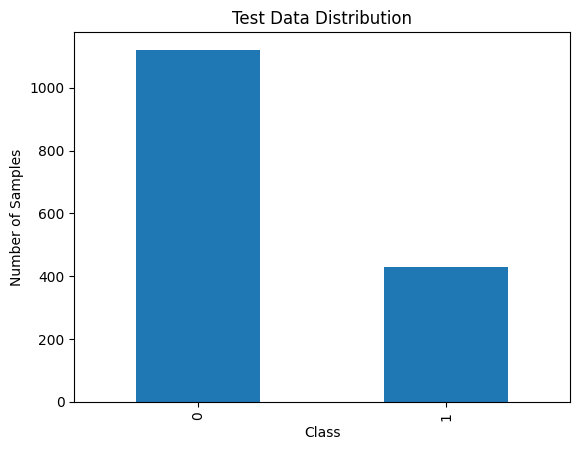

Training Data:(3619, 15),(3619,), Testing Data: (1552, 15),(1552,)
Training Acc: 0.9292622271345675


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

dt = pd.read_csv('Spam_finalData.csv')


# train Test Split
X = dt.drop(['label_num'],axis=1)
y = dt['label_num']
X_train,X_test,y_train,y_test = train_test_split( X,y, test_size=0.3, random_state=42)

# plot distribution
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()


print(f'Training Data:{X_train.shape},{y_train.shape}, Testing Data: {X_test.shape},{y_test.shape}')

model = LogisticRegression()
model.fit(X_train,y_train)
print("Training Acc:",model.score(X_train,y_train))

In [18]:
y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Test Acc Score: ", accuracy_score(y_test,y_pred))

Test Acc Score:  0.9342783505154639


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Test Precision Score: ", precision_score(y_test,y_pred) )
print("Test Recall Score: ",recall_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))

Test Precision Score:  0.8463157894736842
Test Recall Score:  0.9327146171693735
Test F1 Score:  0.8874172185430463


In [28]:
from sklearn.metrics import roc_curve

# this is prediction not probability
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [35]:
y_proba=model.predict_proba(X_test)
y_proba=[i[1] for i in y_proba]
y_proba

[0.03764819116844481,
 0.5675929574893315,
 0.029800886923925348,
 0.002623083774536552,
 0.0015992269830493043,
 0.019164619226769427,
 0.006109284920894298,
 0.05128283552938419,
 0.03404465631131785,
 0.014224269656072715,
 0.828509318093676,
 0.19827754210553356,
 0.6711338177182387,
 0.6151952228108224,
 0.669429590473505,
 0.01343523889323545,
 0.06116606458632417,
 0.019878038936473056,
 0.6735991098342122,
 0.01163274415278177,
 0.3967844584839624,
 0.151778367630368,
 0.009269061208778677,
 0.057222022663824,
 0.0071226365632310685,
 0.05217434626152169,
 0.600215573052692,
 0.012463974498873175,
 0.013883520626541848,
 0.0024739787479959637,
 0.35364142793769543,
 0.11050247404617287,
 0.38457516487737053,
 0.00806507893124933,
 0.8355998696788222,
 0.012556340583535101,
 0.006233592568917659,
 0.7936684796111594,
 0.028659521910996095,
 0.6088197916905209,
 0.002446175144802276,
 0.6416413494844402,
 0.03397986493780068,
 0.8756571763402018,
 0.002215073437988234,
 0.0018140

In [30]:
roc_curve(y_test, [i[1] for i in y_proba])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.92060660e-04,
        8.92060660e-04, 1.78412132e-03, 1.78412132e-03, 2.67618198e-03,
        2.67618198e-03, 3.56824264e-03, 3.56824264e-03, 4.46030330e-03,
        4.46030330e-03, 5.35236396e-03, 5.35236396e-03, 6.24442462e-03,
        6.24442462e-03, 7.13648528e-03, 7.13648528e-03, 8.02854594e-03,
        8.02854594e-03, 8.92060660e-03, 8.92060660e-03, 1.15967886e-02,
        1.15967886e-02, 1.24888492e-02, 1.24888492e-02, 1.33809099e-02,
        1.33809099e-02, 1.42729706e-02, 1.42729706e-02, 1.51650312e-02,
        1.51650312e-02, 1.60570919e-02, 1.60570919e-02, 1.69491525e-02,
        1.69491525e-02, 1.78412132e-02, 1.78412132e-02, 1.78412132e-02,
        1.78412132e-02, 1.87332739e-02, 1.87332739e-02, 1.96253345e-02,
        1.96253345e-02, 2.05173952e-02, 2.05173952e-02, 2.23015165e-02,
        2.23015165e-02, 2.31935772e-02, 2.31935772e-02, 2.40856378e-02,
        2.40856378e-02, 2.58697591e-02, 2.58697591e-02, 2.765388

In [31]:
y_pred.shape,y_test.shape

((1552,), (1552,))

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_pred,y_test) # threshold = 0.5

array([[1048,   29],
       [  73,  402]])

In [36]:
y_pred_6 = [1 if proba>0.6 else 0 for proba in y_proba]
y_pred_6

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,


In [37]:
confusion_matrix(y_pred_6,y_test) # threshold = 0.5

array([[1091,  134],
       [  30,  297]])

```
TPR = TP/TP+FN
FPR= FP/FP+TN

```